# Notebook that will run interactive geoviews plots with panel

### Imports

In [1]:
from datetime import datetime
import pandas as pd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts
import geoviews.tile_sources as gts
import geopandas as gpd
from cartopy import crs as ccrs
import matplotlib as mpl
from bokeh.models import CategoricalColorMapper
from bokeh.transform import factor_cmap
import xarray as xr
import numpy as np
import matplotlib.colors as colors
import datashader as ds
from holoviews.operation.datashader import rasterize
from gradient import Gradient
from bokeh.models import FixedTicker
from holoviews.streams import Selection1D
from holoviews import opts
from matplotlib.colors import ListedColormap
from bokeh.models import LinearColorMapper
import panel as pn
from pyproj import Transformer
from pandas.tseries.offsets import MonthEnd,MonthBegin
import requests
from pathlib import Path
import datetime as dt
import os
import metpy.calc as mpcalc
import scipy.spatial
import dask

### Defining extensions for geoviews and adding in the loading indicator

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
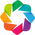

In [2]:
gv.extension('bokeh', 'matplotlib')
pn.extension(loading_spinner='dots', loading_color='grey')
pn.param.ParamMethod.loading_indicator = True

# Load in Data

In [3]:
gdf = gpd.read_file("../data/shapefiles/USA_States.shp")
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
states = gv.Polygons(gdf).opts(linewidth=0.5, color=None)

df = pd.read_csv('../data/ASOS_MPING_data/All_data.csv')
df['Time'] = pd.to_datetime(df['Time'])
cond1 = df['Label'] == 'Precipitation Type'
cond2 = df['Station'] == 'MPING'
MPING = df[cond1 &  cond2]
df = df[~df['Station'].str.contains('MPING')]

/tmp/ipykernel_1599373/856049099.py:5: DtypeWarning: Columns (2,3,4,5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ASOS_MPING_data/All_data.csv')


### CAMP/TICKS For Temp Data

In [4]:
bounds_prate = np.arange(10,65,2.5)
norm_prate = colors.BoundaryNorm(boundaries=bounds_prate, ncolors=len(bounds_prate))
obj_prate = Gradient(
               [['#78de93',10],['#014012',35]],
               [['#f5e902',35],['#f02805',50]],
                [['#f02805',50],['#eb02a5',65]])
cmap_prate = obj_prate.get_cmap(bounds_prate) #Retrieve colormap

bounds_prate_in = [0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9,1]
norm_prate_in = colors.BoundaryNorm(boundaries=bounds_prate_in, ncolors=len(bounds_prate_in))
obj_prate_in = Gradient(
               [['#78de93',0.005],['#014012',0.1]],
               [['#f5e902',0.1],['#f02805',0.3]],
                [['#f02805',0.3],['#eb02a5',1]])
cmap_prate_in = obj_prate_in.get_cmap(bounds_prate_in) #Retrieve colormap

bounds_m = np.arange(5,65,2.5)
norm_m = colors.BoundaryNorm(boundaries=bounds_m, ncolors=len(bounds_m))
obj_snow = Gradient(
               [['#ffffff',5],['#7c78fa',20]],
               [['#7c78fa',20],['#0702a3',30]],
                [['#0702a3',30],['#9000c9',50]],
                [['#9000c9',50],['#ff03fb',65]])
cmap_snow_c = obj_snow.get_cmap(bounds_m) #Retrieve colormap

obj_frzr = Gradient(
               [['#fcacfb',5],['#f000d4',30]],
[['#f000d4',30],['#69015c',65]])
cmap_frzr_c = obj_frzr.get_cmap(bounds_m) #Retrieve colormap

obj_icep = Gradient(
               [['#d299f7',5],['#7200d6',30]],
[['#7200d6',30],['#380169',65]])
cmap_icep_c = obj_icep.get_cmap(bounds_m) #Retrieve colormap

bounds_temp = np.arange(-60,131,1)
norm_temp = colors.BoundaryNorm(boundaries=bounds_temp, ncolors=191)
obj_temp = Gradient([['#36365e',-60.0],['#5097d9',-50.0]],
               [['#5097d9',-50.0],['#2f8764',-40.0]],
               [['#2f8764',-40.0],['#33f5f5',-30.0]],
               [['#33f5f5',-30.0],['#a422b3',-20.0]],
               [['#a422b3',-20.0],['#47064f',-10.0]],
               [['#47064f',-10.0],['#efedf0',0.0]],
               [['#7e7cf7',0.0],['#020b96',10.0]],
               [['#020b96',10.0],['#0047ab',20.0]],
               [['#0047ab',20.0],['#00fffb',32.0]],
               [['#15d15a',32.0],['#00751b',40.0]],
               [['#00751b',40.0],['#67cf00',50.0]],
               [['#67cf00',50.0],['#fbff00',60.0]],
               [['#fbff00',60.0],['#ffae00',70.0]],
               [['#ffae00',70.0],['#de0000',80.0]],
               [['#de0000',80.0],['#96002d',90.0]],
               [['#96002d',90.0],['#e096ad',100.0]],
               [['#e096ad',100.0],['#ad727a',110.0]],
               [['#ad727a',110.0],['#78344b',120]],
               [['#78344b',120.0],['#521d2c',130]])
cmap_temp = obj_temp.get_cmap(bounds_temp) #Retrieve colormap
colors_temp = obj_temp.colors #Retrieve list of hex color values

ticks_temp = [-60,-50,-40,-30,-20,-10,0,10,20,32,40,50,60,70,80,90,100,110,120,130]
ticker_temp = FixedTicker(ticks=ticks_temp)

bounds_chill = np.arange(-60,51,1)
norm_chill = colors.BoundaryNorm(boundaries=bounds_chill, ncolors=191)
obj_chill = Gradient([['#36365e',-60.0],['#5097d9',-50.0]],
               [['#5097d9',-50.0],['#2f8764',-40.0]],
               [['#2f8764',-40.0],['#33f5f5',-30.0]],
               [['#33f5f5',-30.0],['#a422b3',-20.0]],
               [['#a422b3',-20.0],['#47064f',-10.0]],
               [['#47064f',-10.0],['#efedf0',0.0]],
               [['#7e7cf7',0.0],['#020b96',10.0]],
               [['#020b96',10.0],['#0047ab',20.0]],
               [['#0047ab',20.0],['#00fffb',32.0]],
               [['#15d15a',32.0],['#00751b',40.0]],
               [['#00751b',40.0],['#67cf00',50.0]])
cmap_chill = obj_chill.get_cmap(bounds_chill) #Retrieve colormap
colors_chill = obj_chill.colors #Retrieve list of hex color values

ticks_chill = [-60,-50,-40,-30,-20,-10,0,10,20,32,40,50,60,70,80,90,100,110,120,130]
ticker_chill = FixedTicker(ticks=ticks_chill)

bounds_gust = np.arange(10,156,1)
norm_gust = colors.BoundaryNorm(boundaries=bounds_gust, ncolors=len(bounds_gust))
obj_gust = Gradient(
               [['#bfbfbf',10.0],['#828282',20.0]],
               [['#026d9c',20.0],['#43c2fa',39.0]],
               [['#016309',39.0],['#81fc8b',50.0]],
               [['#fcd381',50.0],['#825701',74.0]],
               [['#800501',74.0],['#fa0a02',95.0]],
               [['#592601',95.0],['#b87442',110.0]],
               [['#6b004b',110.0],['#fc03b2',129.0]],
               [['#010575',129.0],['#343bfa',156.0]],)
cmap_gust = obj_gust.get_cmap(bounds_gust) #Retrieve colormap

ticks_gust = [10,20,39,50,74,95,110,129,156]
ticker_gust = FixedTicker(ticks=ticks_gust)

precip_levs_default = [0, 0.01, 0.1, 0.25, 0.50, 1.0, 1.5, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0, 15.0, 20.0, 30.0]
def precip_nws(levels = precip_levs_default, return_array = False, omit_trace = True):
    precip_levs = levels
    nws_apcp_colors = [[255,255,255], 
        [206,232,195],
        [173,215,161],
        [135,194,126],
        [85,160,92],
        [46,107,52],
        [254,250,153],
        [247,206,102],
        [239,147,79],
        [233,91,59],
        [197,50,42],
        [158,31,44],
        [102,16,39],
        [53,5,46],
        [69,8,111],
        [249,220,253]]
    c = np.array(nws_apcp_colors)/255.
    if omit_trace:
        c = c[1:]
        precip_levs = precip_levs[1:]
    if return_array:
        return (c)
    else:
        cmap_precip = mpl.colors.ListedColormap(c)
        if omit_trace: cmap_precip.set_under((1,1,1,0)) #set values below min to transparent white
        norm_precip = mpl.colors.BoundaryNorm(precip_levs, ncolors = len(c))
        return (cmap_precip, norm_precip, precip_levs)
    
cmap_acp, norm_acp, acp_levs = precip_nws()
ticker_precip = FixedTicker(ticks=acp_levs)

In [6]:
### being able to cut coordinates down to just the US
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
lon1, lat1 = transformer.transform(20,-130)
lon2, lat2 = transformer.transform(55,-65)

#for model/hi res data that takes a while to load
lon3, lat3 = transformer.transform(37,80)
lon4, lat4 = transformer.transform(47,-65)

header = pn.widgets.RadioButtonGroup(name='Header', options=['Real Time Data', 'Model Data', 'ERA-5 Reanalysis Data'], button_type='primary')

dropdown1 = pn.widgets.Select(name='Real Time Data', options=['Precipitation Type', '2m Temperature', 'Real Feel Temperature','Wind Gust','1hr Precipitation','24hr Precipitation'])
dropdown2 = pn.widgets.Select(name='Model Overlay', options=['None', 'RTMA'])
dropdown3 = pn.widgets.Select(name='Model Variable', options=['None','2m Temperature'])

dropdown4 = pn.widgets.Select(name='Model', options=['None'])
dropdown5 = pn.widgets.Select(name='Variable', options=['None'])
dropdown6 = pn.widgets.Select(name='Overlay', options=['None'])

dropdown7 = pn.widgets.Select(name='Variable', options=['Select Variable','Mean Sea Level Pressure','Temperature','Dewpoint','Precipitation Type','Precipitaiton Rate'])
dropdown8 = pn.widgets.Select(name='Pressure Level', options=['Select Level','10 Meter','100 Meter'])
dropdown9 = pn.widgets.Select(name='Pressure Level', options=['Select Level','500 hPa','250 hPa'])
dropdown10 = pn.widgets.Select(name='Pressure Level', options=['Select Level','2 Meter'])
datepicker1 = pn.widgets.DatePicker(name='Start Date')
datepicker2 = pn.widgets.DatePicker(name='End Date')

# functions that automatically set the end date to within 3 days of the users selected start date
def update_end_date(event):
    start_date = event.new
    end_date = start_date + dt.timedelta(days=2)
    datepicker2.end = end_date
    datepicker2.start = start_date
    datepicker2.value = end_date
    
datepicker1.param.watch(update_end_date, 'value')

# function that watches the header for changes and can toggle certain menu's on and off
@pn.depends(header.param.value)
def toggle_components(value):
    if header.value == 'Real Time Data':
        dropdown1.visible = True
        dropdown2.visible = True
        dropdown3.visible = True
        dropdown4.visible = False
        dropdown5.visible = False
        dropdown6.visible = False
        dropdown7.visible = False
        dropdown8.visible = False
        dropdown9.visible = False
        dropdown10.visible = False
        datepicker1.visible = False
        datepicker2.visible = False
    if header.value == 'Model Data':
        dropdown1.visible = False
        dropdown2.visible = False
        dropdown3.visible = False
        dropdown4.visible = True
        dropdown5.visible = True
        dropdown6.visible = True
        dropdown7.visible = False
        dropdown8.visible = False
        dropdown9.visible = False
        dropdown10.visible = False
        datepicker1.visible = False
        datepicker2.visible = False
    if header.value == 'ERA-5 Reanalysis Data':
        dropdown1.visible = False
        dropdown2.visible = False
        dropdown3.visible = False
        dropdown4.visible = False
        dropdown5.visible = False
        dropdown6.visible = False
        dropdown7.visible = True
        dropdown8.visible = False
        dropdown9.visible = False
        dropdown10.visible = False
        datepicker1.visible = True
        datepicker2.visible = True
        
@pn.depends(dropdown7.param.value)
def toggle_components_era(value):
    if dropdown7.value == 'Wind Speed':
        dropdown8.visible = True
        dropdown9.visible = False
        dropdown10.visible = False
    if dropdown7.value == 'Temperature':
        dropdown8.visible = False
        dropdown9.visible = False
        dropdown10.visible = True
    if dropdown7.value == 'Mean Sea Level Pressure' or dropdown7.value == 'Snowfall'or dropdown7.value == 'Precipitation Rate'or dropdown7.value == 'Precipitation Type':
        dropdown8.visible = False
        dropdown9.visible = False
        dropdown10.visible = False

#watching the header for when it changes so that it can toggle which menu's are shown below the header
header.param.watch(toggle_components, 'value')
dropdown7.param.watch(toggle_components_era, 'value')

load_map_button = pn.widgets.Button(name='Readload Map', button_type='primary')

@pn.depends(load_map_button.param.clicks)
def update_map(event):
    if header.value == 'Real Time Data':
        kdims=['Lon','Lat','Time']
        if dropdown1.value == 'Precipitation Type':
            vdims = ['Station','OBS Time','Current WX','WX Code', 'Temperature (F)','color','Precipitation Label']
        if dropdown1.value == '2m Temperature':
            vdims = ['Station','OBS Time','Temperature (F)']
        if dropdown1.value == 'Real Feel Temperature':
            vdims = ['Station','OBS Time','Real Feel Temperature','Temperature (F)']
        if dropdown1.value == 'Wind Gust':
            vdims = ['Station','Max Gust (mph)']
        if dropdown1.value == '1hr Precipitation':
            vdims = ['Station','1 Hour Precipitation']
        if dropdown1.value == '24hr Precipitation':
            vdims = ['Station','24 Hour Precipitation']
            kdims = ['Lon','Lat']

        df_sel = df.loc[df["Label"] == dropdown1.value]
        if dropdown1.value == '2m Temperature':
            df_sel['Temperature (F)'] = df_sel['Temperature (F)'].astype(float)
        ds = gv.Dataset(df_sel, kdims=kdims)
        plot = (ds.to(gv.Points, ["Lon", "Lat"], vdims=vdims))
        if dropdown1.value == 'Precipitation Type':
            ds_mping = gv.Dataset(MPING, kdims=kdims)
            plot_mping = (ds_mping.to(gv.Points, ["Lon", "Lat"], vdims=vdims))
            
        
        if dropdown1.value == 'Precipitation Type':
            labels = ds.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='Precipitation Label').opts(
    text_font_size='10pt', text_color='white')
            labels_mping = ds_mping.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='Precipitation Label').opts(
    text_font_size='10pt', text_color='white')
        if dropdown1.value == '2m Temperature':
            labels = ds.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='Temperature (F)_r').opts(
    text_font_size='10pt', text_color='white')
        if dropdown1.value == 'Real Feel Temperature':
            labels = ds.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='Real Feel Temperature').opts(
    text_font_size='10pt', text_color='white')
        if dropdown1.value == 'Wind Gust':
            labels = ds.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='Max Gust (mph)').opts(
    text_font_size='10pt', text_color='white')
        if dropdown1.value == '1hr Precipitation':
            labels = ds.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='1 Hour Precipitation').opts(
    text_font_size='10pt', text_color='white')
        if dropdown1.value == '24hr Precipitation':
            labels = ds.to(gv.Labels, kdims=['Lon', 'Lat'],vdims='24 Hour Precipitation').opts(
    text_font_size='10pt', text_color='white')
        
        ####################### REAL TIME DATA ##########################
        if dropdown1.value == 'Precipitation Type' and dropdown2.value == 'None' and dropdown3.value == 'None':
            return  pn.panel(gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),frame_width=1600, frame_height=1000,title=dropdown1.value) * (plot.opts(size=35, color='color',tools=['hover'])*labels * plot_mping.opts(marker='diamond', size=50, color='color',tools=['hover']))*labels_mping*states)
        if dropdown1.value == '2m Temperature' and dropdown2.value == 'None' and dropdown3.value == 'None':
            return pn.panel(gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),frame_width=1600, frame_height=1000,title=dropdown1.value) *  (plot.opts(size=35, color='Temperature (F)', axiswise=True, cmap=cmap_temp, colorbar=True, clim=(-60,131.5), colorbar_opts={'ticker': ticker_temp},  tools=['hover'])*labels*states))
        if dropdown1.value == 'Real Feel Temperature' and dropdown2.value == 'None' and dropdown3.value == 'None':
            return  pn.panel(gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),frame_width=1600, frame_height=1000,title=dropdown1.value)  * (plot.opts(size=20, color='Real Feel Temperature', axiswise=True, cmap=cmap_temp, colorbar=True, clim=(-60,131.5), colorbar_opts={'ticker': ticker_chill},  tools=['hover'])*labels*states))
        if dropdown1.value == 'Wind Gust' and dropdown2.value == 'None' and dropdown3.value == 'None':
            return  pn.panel(gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),frame_width=1600, frame_height=1000,title=dropdown1.value)  * (plot.opts(size=20, color='Max Gust (mph)', axiswise=True, cmap=cmap_gust, colorbar=True, clim=(10,156), colorbar_opts={'ticker': ticker_gust},  tools=['hover'])*labels*states))
        if dropdown1.value == '1hr Precipitation' and dropdown2.value == 'None' and dropdown3.value == 'None':
            return pn.panel(gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),frame_width=1600, frame_height=1000,title=dropdown1.value)  * (plot.opts(size=20, color='1 Hour Precipitation', axiswise=True, cmap=cmap_acp, colorbar=True, clim=(0.01,3), colorbar_opts={'ticker': ticker_precip},  tools=['hover'])*labels*states))
        if dropdown1.value == '24hr Precipitation' and dropdown2.value == 'None' and dropdown3.value == 'None':
            return  pn.panel(gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),frame_width=1600, frame_height=1000,title=dropdown1.value)  * (plot.opts(size=20, color='24 Hour Precipitation', axiswise=True, cmap=cmap_acp, colorbar=True, clim=(0.01,3), colorbar_opts={'ticker': ticker_precip},  tools=['hover'])*labels*states))
 
    if header.value == 'Model Data':
        pass
    if header.value == 'ERA-5 Reanalysis Data':
        ############# ERA-5 DATA ############################
        if datepicker2.value is not None:
            try:
                date1 = datepicker1.value
                date2 = datepicker2.value

                YYYYMMDD = date1.strftime("%Y-%m-%d")
                YYYYMMDD2 = date2.strftime("%Y-%m-%d")
                YYYYMMDDHH = date1.strftime("%Y-%m-%dT06:00:00.000000000")
                
                if dropdown7.value == 'Temperature' or dropdown7.value == 'Dewpoint' or dropdown7.value == 'Mean Sea Level Pressure' or dropdown7.value == 'Wind':

                    reanalysis = xr.open_zarr(
                        'gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr', 
                        chunks={'time': 48},
                        consolidated=True,
                    )

                    an_date_cropped = reanalysis.sel(time=slice(YYYYMMDD, YYYYMMDD2))
                    
                if dropdown7.value == 'Snowfall' or dropdown7.value == 'Precipitation Rate' or dropdown7.value == 'Precipitation Type' or dropdown7.value == 'Total Precipitation' or dropdown7.value == '6-Hour Snowfall':

                    reanalysis = xr.open_zarr(
                        'gs://gcp-public-data-arco-era5/co/single-level-forecast.zarr/', 
                        chunks={'time': 48},
                        consolidated=True,
                    )

                    an_date_cropped = reanalysis.sel(time=YYYYMMDDHH)

                def lon_to_360(dlon: float) -> float:
                    return ((360 + (dlon % 360)) % 360)

                cond = (an_date_cropped.longitude > lon_to_360(-130)) & (an_date_cropped.latitude > 24) & \
                       (an_date_cropped.longitude < lon_to_360(-65)) & (an_date_cropped.latitude < 50)
                cond = dask.compute(cond)[0]

                ds_cropped = an_date_cropped.where(cond, drop=True)

                def mirror_point_at_360(ds_cropped):
                    extra_point = (
                        ds_cropped.where(ds_cropped.longitude == 0, drop=True)
                        .assign_coords(longitude=lambda x: x.longitude + 360)
                    )
                    return xr.concat([ds_cropped, extra_point], dim='values')

                def build_triangulation(x, y):
                    grid = np.stack([x, y], axis=1)
                    return scipy.spatial.Delaunay(grid)

                def interpolate(data, tri, mesh):
                    indices = tri.find_simplex(mesh)
                    ndim = tri.transform.shape[-1]
                    T_inv = tri.transform[indices, :ndim, :]
                    r = tri.transform[indices, ndim, :]
                    c = np.einsum('...ij,...j', T_inv, mesh - r)
                    c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
                    result = np.einsum('...i,...i', data[:, tri.simplices[indices]], c)
                    return np.where(indices == -1, np.nan, result)

                ds_full = ds_cropped.pipe(mirror_point_at_360)

                longitude = np.linspace(0, 360, num=360*4+1)
                latitude = np.linspace(-90, 90, num=180*4+1)
                mesh = np.stack(np.meshgrid(longitude, latitude, indexing='ij'), axis=-1)
                tri = build_triangulation(ds_full.longitude, ds_full.latitude)

                if dropdown7.value == 'Temperature':
                    if dropdown10.value == '2 Meter':
                        ds_full2 = ds_full['t2m']
                        t2m_mesh = interpolate(ds_full2.values, tri, mesh)
                        t2m = xr.DataArray(t2m_mesh, coords=[('time', ds_full.time.data), ('longitude', longitude), ('latitude', latitude)])
                        t2m = (t2m-273.15)*(9/5)+32
                        vdim='t2m'
                        
                    else:
                        pass
                    
                    dataset_era = gv.Dataset(t2m, kdims=['longitude','latitude','time'],vdims=vdim)

                    QM_era = gv.project(dataset_era.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster = rasterize(QM_era, precompute=True)

                    return (gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),title=f'ERA-5 Reanalysis Data', frame_width=1600, frame_height=1000)  * (QM_raster.opts(tools=['hover'], axiswise=True, cmap=cmap_temp, colorbar=True, clim=(-60,131.5), alpha=0.8)))*states
                
                if dropdown7.value == 'Dewpoint':
                    ds_full2 = ds_full['d2m']
                    d2m_mesh = interpolate(ds_full2.values, tri, mesh)
                    d2m = xr.DataArray(d2m_mesh, coords=[('time', ds_full.time.data), ('longitude', longitude), ('latitude', latitude)])
                    d2m = (d2m-273.15)*(9/5)+32
                    vdim='d2m'
                        
                    dataset_era = gv.Dataset(d2m, kdims=['longitude','latitude','time'],vdims=vdim)

                    QM_era = gv.project(dataset_era.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster = rasterize(QM_era, precompute=True)
                    
                    return (gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),title=f'ERA-5 Reanalysis Data', frame_width=1600, frame_height=1000)  * (QM_raster.opts(tools=['hover'], axiswise=True, cmap=cmap_temp, colorbar=True, clim=(-60,131.5), alpha=0.8)))*states
                
                if dropdown7.value == 'Mean Sea Level Pressure':
                    ds_full2 = ds_full['msl']
                    slp_mesh = interpolate(ds_full2.values, tri, mesh)
                    slp = xr.DataArray(slp_mesh, coords=[('time', ds_full.time.data), ('longitude', longitude), ('latitude', latitude)])
                    slp = slp/100
                    vdim='msl'

                    slpLevels = np.arange(800,1080,4)

                    dataset_era = gv.Dataset(slp, kdims=['longitude','latitude','time'],vdims=vdim)
                    QM_era = gv.project(dataset_era.to(gv.LineContours, ['longitude', 'latitude']))

                    return (gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),title=f'ERA-5 Reanalysis Data',frame_width=1600, frame_height=1000)  * (QM_era.opts(tools=['hover'], levels=slpLevels, show_legend=False, line_width=3)))
                
                if dropdown7.value == '6-Hour Snowfall':
                    ds_full2 = ds_full['sf']
                    ds_full2 = ds_full2.where(ds_full2 != 0, np.nan)
                    start_time = ds_full.time.values
                    datetimes_list = [start_time + np.timedelta64(i, 'h') for i in np.arange(0, 19*6, 6)]
                    ds_full2 = ds_full2.assign_coords(step=datetimes_list)
                    sf_mesh = interpolate(ds_full2.values, tri, mesh)
                    sf = xr.DataArray(sf_mesh, coords=[('time', ds_full2.step.data), ('longitude', longitude), ('latitude', latitude)])
                    sf = sf*39.3701
                    vdim='sf'

                    sfLevels = np.arange(900,1080,4)

                    dataset_era = gv.Dataset(sf, kdims=['longitude','latitude','time'],vdims=vdim)
                    QM_era = gv.project(dataset_era.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster = rasterize(QM_era, precompute=True)

                    return (gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),title=f'ERA-5 Reanalysis Data', frame_width=1600, frame_height=1000)  * (QM_raster.opts(tools=['hover'], axiswise=True, cmap='blues', colorbar=True, clim=(0,1), alpha=0.8)))*states
                
                if dropdown7.value == 'Precipitation Rate':
                    ptype = ds_full['ptype']
                    lsrr = ds_full['lsrr']
                    crr = ds_full['crr']
                    csfr = ds_full['csfr']
                    lssfr = ds_full['lssfr']
                    ds_full['prate'] = ((lsrr+crr+csfr+lssfr)*86400*.0393701)/24
                    ds_full2 = ds_full['prate'].where(ds_full['prate'] > 0.005, np.nan)

                    start_time = ds_full.time.values
                    datetimes_list = [start_time + np.timedelta64(i, 'h') for i in np.arange(0, 19*6, 6)]
                    ds_full2 = ds_full2.assign_coords(step=datetimes_list)
                    ptype_mesh = interpolate(ds_full2.values, tri, mesh)
                    ptype = xr.DataArray(ptype_mesh, coords=[('time', ds_full2.step.data), ('longitude', longitude), ('latitude', latitude)])

                    vdim='prate'

                    dataset_era = gv.Dataset(ptype, kdims=['longitude','latitude','time'],vdims=vdim)
                    QM_era = gv.project(dataset_era.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster = rasterize(QM_era, precompute=True)
                    
                    return (gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),title=f'ERA-5 Reanalysis Data', frame_width=1600, frame_height=1000)  * (QM_raster.opts(tools=['hover'], axiswise=True, cmap=cmap_prate_in, colorbar=True, clim=(0.005,0.26), alpha=0.8)))*states
                
                if dropdown7.value == 'Precipitation Type':
                
                    lsrr = ds_full['lsrr']
                    crr = ds_full['crr']
                    csfr = ds_full['csfr']
                    lssfr = ds_full['lssfr']
                    ds_full['prate'] = ((lsrr+crr+csfr+lssfr)*86400*.0393701)/24
                    ds_full['prate'] = ds_full['prate'].where(ds_full['prate'] > 0.005, np.nan)

                    ds_full['rain_rate'] = ds_full['prate'].where(ds_full['ptype'] == 1, np.nan)
                    ds_full['frzr_rate'] = ds_full['prate'].where(ds_full['ptype'] == 3, np.nan)
                    ds_full['snow_rate'] = ds_full['prate'].where((ds_full['ptype'] == 5) | (ds_full['ptype'] == 6) | (ds_full['ptype'] == 7), np.nan)
                    ds_full['icep_rate'] = ds_full['prate'].where(ds_full['ptype'] == 8, np.nan)

                    start_time = ds_full.time.values
                    datetimes_list = [start_time + np.timedelta64(i, 'h') for i in np.arange(0, 19*6, 6)]
                    ds_full2 = ds_full.assign_coords(step=datetimes_list)

                    ds_rain = ds_full2['rain_rate']
                    ds_frzr = ds_full2['frzr_rate']
                    ds_snow = ds_full2['snow_rate']
                    ds_icep = ds_full2['icep_rate']

                    rain_mesh = interpolate(ds_rain.values, tri, mesh)
                    rain = xr.DataArray(rain_mesh, coords=[('time', ds_full2.step.data), ('longitude', longitude), ('latitude', latitude)])

                    frzr_mesh = interpolate(ds_frzr.values, tri, mesh)
                    frzr = xr.DataArray(frzr_mesh, coords=[('time', ds_full2.step.data), ('longitude', longitude), ('latitude', latitude)])

                    snow_mesh = interpolate(ds_snow.values, tri, mesh)
                    snow = xr.DataArray(snow_mesh, coords=[('time', ds_full2.step.data), ('longitude', longitude), ('latitude', latitude)])

                    icep_mesh = interpolate(ds_icep.values, tri, mesh)
                    icep = xr.DataArray(icep_mesh, coords=[('time', ds_full2.step.data), ('longitude', longitude), ('latitude', latitude)])

                    dataset_era_rain = gv.Dataset(rain, kdims=['longitude','latitude','time'],vdims='rain_rate')
                    QM_era_rain = gv.project(dataset_era_rain.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster_rain = rasterize(QM_era_rain, precompute=True)

                    dataset_era_frzr = gv.Dataset(frzr, kdims=['longitude','latitude','time'],vdims='frzr_rate')
                    QM_era_frzr = gv.project(dataset_era_frzr.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster_frzr = rasterize(QM_era_frzr, precompute=True)

                    dataset_era_snow = gv.Dataset(snow, kdims=['longitude','latitude','time'],vdims='snow_rate')
                    QM_era_snow = gv.project(dataset_era_snow.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster_snow = rasterize(QM_era_snow, precompute=True)

                    dataset_era_icep = gv.Dataset(icep, kdims=['longitude','latitude','time'],vdims='icep_rate')
                    QM_era_icep = gv.project(dataset_era_icep.to(gv.QuadMesh, ['longitude', 'latitude']))
                    QM_raster_icep = rasterize(QM_era_icep, precompute=True)
                    
                    return (gv.tile_sources.OSM().opts(xlim=(lon1, lon2),ylim=(lat1, lat2),title=f'ERA-5 Reanalysis Data', frame_width=1600, frame_height=1000)  * (QM_raster_rain.opts(axiswise=True, cmap=cmap_prate_in, clim=(0.005,0.26), alpha=0.8))
                                                                                                                                                            * (QM_raster_frzr.opts(axiswise=True, cmap='Reds', clim=(0.005,0.26), alpha=0.8))
                                                                                                                                                            * (QM_raster_snow.opts(axiswise=True, cmap='Blues', clim=(0.005,0.26), alpha=0.8))
                                                                                                                                                            * (QM_raster_icep.opts(axiswise=True, cmap='Purples', clim=(0.005,0.26), alpha=0.8)))*states
            except:
                return pn.pane.Alert('ERA-5 Data Not Available for Those Dates: Please try choosing another date', alert_type='danger')
                
menu = pn.Column(header, dropdown1, dropdown2, dropdown3, dropdown4,dropdown5,dropdown6,dropdown7, dropdown8,dropdown9,dropdown10, datepicker1, datepicker2, load_map_button)
toggle_components(header.value)
toggle_components_era(dropdown7.value)
load_map_button.param.watch(update_map, "clicks")
row = pn.Row(menu, update_map)
row


Row
    [0] Column
        [0] RadioButtonGroup(button_type='primary', name='Header', options=['Real Time Data', ...], value='Real Time Data')
        [1] Select(name='Real Time Data', options=['Precipitation Type', ...], value='Precipitation Type')
        [2] Select(name='Model Overlay', options=['None', 'RTMA'], value='None')
        [3] Select(name='Model Variable', options=['None', '2m T...], value='None')
        [4] Select(name='Model', options=['None'], value='None', visible=False)
        [5] Select(name='Variable', options=['None'], value='None', visible=False)
        [6] Select(name='Overlay', options=['None'], value='None', visible=False)
        [7] Select(name='Variable', options=['Select Variable', ...], value='Select Variable', visible=False)
        [8] Select(name='Pressure Level', options=['Select Level', ...], value='Select Level', visible=False)
        [9] Select(name='Pressure Level', options=['Select Level', ...], value='Select Level', visible=False)
        [10] Select(name='Pressure Level', options=['Select Level', ...], value='Select Level', visible=False)
        [11] DatePicker(name='Start Date', visible=False)
        [12] DatePicker(name='End Date', visible=False)
        [13] Button(button_type='primary', name='Readload Map')
    [1] ParamFunction(function, _pane=Row)